# Part 1: Load the data and create a datetime index

# Imports and Libraries

In [1]:
import pandas as pd
from datetime import datetime
from matplotlib import dates as mdates
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Load the Data

In [2]:
url = "C:/Users/16024/Desktop/Resample.csv"
df = pd.read_csv(url)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


# Data Cleaning

##  Convert the date column to datetime dtype.

In [3]:
df['format_data'] = pd.to_datetime(df['date'])
print(df['format_data'].dtype)

datetime64[ns]


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  int64         
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
 10  format_data       15341 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 1.3 MB


In [5]:
df['format_data'].head(10)

0   1970-01-01 00:00:00.019790101
1   1970-01-01 00:00:00.019790102
2   1970-01-01 00:00:00.019790103
3   1970-01-01 00:00:00.019790104
4   1970-01-01 00:00:00.019790105
5   1970-01-01 00:00:00.019790106
6   1970-01-01 00:00:00.019790107
7   1970-01-01 00:00:00.019790108
8   1970-01-01 00:00:00.019790109
9   1970-01-01 00:00:00.019790110
Name: format_data, dtype: datetime64[ns]

In [6]:
## Previewing first row from the datetime column
df.loc[0,'format_data']

Timestamp('1970-01-01 00:00:00.019790101')

In [7]:
# Correcting the formatting because the hours, minutes, and seconds are not needed.
df['format_date'] = pd.to_datetime(df['date'], format='%Y%m%d')

print(df['format_date'].dtype)
df['format_date'].head(10)

datetime64[ns]


0   1979-01-01
1   1979-01-02
2   1979-01-03
3   1979-01-04
4   1979-01-05
5   1979-01-06
6   1979-01-07
7   1979-01-08
8   1979-01-09
9   1979-01-10
Name: format_date, dtype: datetime64[ns]

In [8]:
# Renaming the column
df.drop(columns = 'date', inplace = True)
df.rename(columns={'format_date':'date'}, inplace=True)
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,format_data,date
0,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1970-01-01 00:00:00.019790101,1979-01-01
1,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1970-01-01 00:00:00.019790102,1979-01-02
2,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1970-01-01 00:00:00.019790103,1979-01-03
3,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1970-01-01 00:00:00.019790104,1979-01-04
4,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1970-01-01 00:00:00.019790105,1979-01-05


## Set the date column as the index.

In [9]:
df = df.set_index('date')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15341 entries, 1979-01-01 to 2020-12-31
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   cloud_cover       14938 non-null  float64       
 1   sunshine          14957 non-null  float64       
 2   global_radiation  14939 non-null  float64       
 3   max_temp          14951 non-null  float64       
 4   mean_temp         14922 non-null  float64       
 5   min_temp          14955 non-null  float64       
 6   precipitation     14951 non-null  float64       
 7   pressure          14953 non-null  float64       
 8   snow_depth        13589 non-null  float64       
 9   format_data       15341 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.3 MB


## Filter out only the required data:

## Only need the data from the year 2000 or later.

In [10]:
df = df.loc['2000':]
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,format_data
date,,,,,,,,,,
2000-01-01,7.0,0.4,18.0,10.8,7.0,4.9,0.0,102450.0,0.0,1970-01-01 00:00:00.020000101
2000-01-02,7.0,0.7,20.0,11.5,7.9,5.0,0.2,102530.0,0.0,1970-01-01 00:00:00.020000102
2000-01-03,8.0,0.0,13.0,9.5,9.4,7.2,6.0,101860.0,0.0,1970-01-01 00:00:00.020000103
2000-01-04,5.0,2.9,34.0,11.0,7.0,4.4,0.2,101480.0,0.0,1970-01-01 00:00:00.020000104
2000-01-05,5.0,1.3,25.0,10.8,6.4,1.9,0.8,101420.0,0.0,1970-01-01 00:00:00.020000105
...,...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN,1970-01-01 00:00:00.020201227
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN,1970-01-01 00:00:00.020201228
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN,1970-01-01 00:00:00.020201229


## Keep the following features:

precipitation

mean_temp

min_temp

max_temp

snow_depth


In [11]:
keep_those = ['precipitation', 'mean_temp', 'min_temp', 'max_temp', 'snow_depth']
df = df[keep_those]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  7281 non-null   float64
 1   mean_temp      7252 non-null   float64
 2   min_temp       7285 non-null   float64
 3   max_temp       7281 non-null   float64
 4   snow_depth     5919 non-null   float64
dtypes: float64(5)
memory usage: 359.6 KB


In [12]:
df.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0


## Impute any missing values.

In [13]:
# Missing value count
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [14]:
for col in df:
    df[col] = df[col].interpolate()

In [15]:
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

# Part 2: Answer 2 Questions using visualizations and the correct frequency data

# Q1: What month had the Most Precipitation from 2000 - 2010?

In [16]:
# Filtering df_Q1 for an appropriate column
df_Q1 = df['precipitation'].copy()
df_Q1.head()

date
2000-01-01    0.0
2000-01-02    0.2
2000-01-03    6.0
2000-01-04    0.2
2000-01-05    0.8
Name: precipitation, dtype: float64

In [17]:
# Setting range of years from 2000-2010
df_Q1 = df_Q1.loc['2000':'2010']
df_Q1

date
2000-01-01    0.0
2000-01-02    0.2
2000-01-03    6.0
2000-01-04    0.2
2000-01-05    0.8
             ... 
2010-12-27    5.0
2010-12-28    0.4
2010-12-29    1.4
2010-12-30    0.0
2010-12-31    0.0
Name: precipitation, Length: 4018, dtype: float64

In [18]:
# Resampling with monthly frequency; taking the mean of month
df_Q1 = df_Q1.resample("MS").mean()

# check
df_Q1

date
2000-01-01    0.467742
2000-02-01    2.234483
2000-03-01    0.448387
2000-04-01    2.750000
2000-05-01    2.516129
                ...   
2010-08-01    2.980645
2010-09-01    1.486667
2010-10-01    2.035484
2010-11-01    1.066667
2010-12-01    0.687097
Freq: MS, Name: precipitation, Length: 132, dtype: float64

In [19]:
# Finding the date of Max Value
max_precip_date = df_Q1.idxmax()

# check
print(max_precip_date)

df_Q1.loc[max_precip_date]

2000-10-01 00:00:00


4.925806451612903

# Plot Results for the Month of August between the years of 2000 to 2010.

The years that had the most amount of rain were 2001, 2003. and 2010.

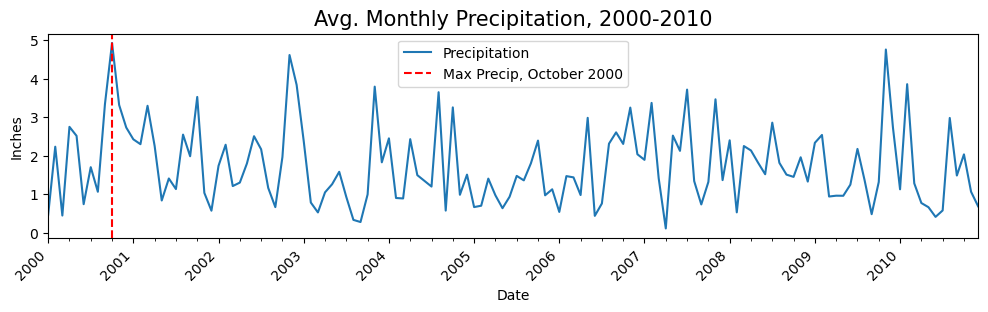

In [20]:
# Plotting the dataset.

fig, ax = plt.subplots(figsize = (12, 3))


df_Q1.plot(ax = ax)


fig.autofmt_xdate(which = 'major', rotation = 45)

ax.set_title('Avg. Monthly Precipitation, 2000-2010', fontsize = 15)
ax.set_ylabel('Inches')
ax.set_xlabel('Date')
   
    
ax.axvline(x = max_precip_date, color = 'r', linestyle = '--',
          label = f'Max Precip, {max_precip_date:%B %Y}')


handles, labels = ax.get_legend_handles_labels()
labels = [label.title() for label in labels]


ax.legend(handles,
          labels,
          loc = 'best');

# Q2: Year with the Coldest Avg Temp from 2000 - 2020?



In [21]:
# Filtering df_Q2 for the appropriate column
df_Q2 = df['mean_temp'].copy()
df_Q2.head()

date
2000-01-01    7.0
2000-01-02    7.9
2000-01-03    9.4
2000-01-04    7.0
2000-01-05    6.4
Name: mean_temp, dtype: float64

In [22]:
# Resampling with the monthly frequency; taking the mean of month
df_Q2 = df_Q2.resample("AS").mean()

# check
df_Q2

date
2000-01-01    11.575683
2001-01-01    11.331507
2002-01-01    12.084247
2003-01-01    12.114521
2004-01-01    11.900683
2005-01-01    11.822877
2006-01-01    12.290822
2007-01-01    11.944384
2008-01-01    11.326776
2009-01-01    11.721644
2010-01-01    10.657397
2011-01-01    12.366438
2012-01-01    11.300956
2013-01-01    11.166301
2014-01-01    12.658904
2015-01-01    12.123699
2016-01-01    11.906284
2017-01-01    12.242466
2018-01-01    12.501370
2019-01-01    12.206164
2020-01-01    12.723634
Freq: AS-JAN, Name: mean_temp, dtype: float64

In [23]:
# Setting the range of years from 2000-2020
df_Q2 = df_Q2.loc['2000':'2020']
df_Q2

date
2000-01-01    11.575683
2001-01-01    11.331507
2002-01-01    12.084247
2003-01-01    12.114521
2004-01-01    11.900683
2005-01-01    11.822877
2006-01-01    12.290822
2007-01-01    11.944384
2008-01-01    11.326776
2009-01-01    11.721644
2010-01-01    10.657397
2011-01-01    12.366438
2012-01-01    11.300956
2013-01-01    11.166301
2014-01-01    12.658904
2015-01-01    12.123699
2016-01-01    11.906284
2017-01-01    12.242466
2018-01-01    12.501370
2019-01-01    12.206164
2020-01-01    12.723634
Freq: AS-JAN, Name: mean_temp, dtype: float64

In [24]:
# Finding the  Date of Max Value
min_temp = df_Q2.idxmin()

# check
print(min_temp)

df_Q2.loc[min_temp]

2010-01-01 00:00:00


10.657397260273973

## The year with the coldest average temperature was 2010.